<a href="https://colab.research.google.com/github/kraslav4ik/Climber-Or-Mountaineer/blob/master/myaistart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Climbing vs mountaineering**

Install libraries:

In [25]:
!pip install -Uqq fastai duckduckgo_search

Clean all the data

In [26]:
![ -e climber ] && rm -r climber
![ -e moutaineer ] && rm -r moutaineer

Imports:

In [27]:
from duckduckgo_search import DDGS
from IPython.display import display
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from time import sleep
import os

Function for searching the images

In [28]:
def search_images(term, max_items):
  with DDGS() as ddgs:
    return [obj["image"] for obj in ddgs.images(keywords=term, max_results=max_items)]

Search for the images in the web to train the model and download them

In [29]:
climbing_pictures = search_images("climber on the rock", 150)
sleep(5)
mountainering_pictures = search_images("mountaineering", 150)

# path = Path()
# (path/"folder_with_climbers").mkdir(exist_ok=True, parents=True)
# (path/"folder_with_mountaineers").mkdir(exist_ok=True, parents=True)
download_images("climber", urls=climbing_pictures)
download_images("mountaineer", urls=mountainering_pictures)

Remove images which cannot be open

In [30]:
path = Path()
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#5) [None,None,None,None,None]

Create datablocks (preprocessing images, name the labels, split data into training and validation sets)

In [31]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    # get_y=lambda fname: "climber" if fname.name in os.listdir(Path()/"folder_with_climbers") else "mountaineer",
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

Train the model (3 epochs with pre-trained resnet18)

In [32]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.920115,0.121915,0.048780,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.253561,0.116004,0.036585,00:21
1,0.213625,0.150604,0.036585,00:22
2,0.138733,0.178699,0.048780,00:22


Predict

Put your image into the 'test' folder. Once image is uploaded, model will make a prediction


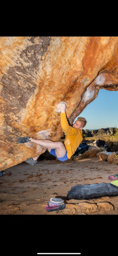

This is a: climber.
Probability it's a climber: 1.0000
Now try to upload another image


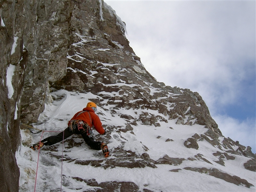

This is a: climber.
Probability it's a climber: 0.7838
Now try to upload another image


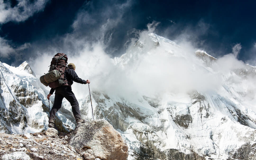

This is a: mountaineer.
Probability it's a climber: 0.0092
Now try to upload another image


In [ ]:
![ -e test ] && rm -r test

os.mkdir("test")

size_before = 0
size_after = size_before
print("Put your image into the 'test' folder. Once image is uploaded, model will make a prediction")

while True:
  sleep(5)
  size_after = len(os.listdir(path/"test"))
  if size_after != size_before:
    dest = path/"test"/(os.listdir(path/"test")[0])
    is_climber,_,probs = learn.predict(PILImage.create(dest))
    display(Image.open(dest).to_thumb(256,256))
    print(f"This is a: {is_climber}.")
    print(f"Probability it's a climber: {probs[0]:.4f}")
    os.remove(dest)
    print("Now try to upload another image")
